### 下载并读取国际卖场数据，完成以下需求：

    1. 创建气泡图，展示销售总额排名前10的国家中办公类商品的各个国家的销售总额。

    2. 要求图表长15，宽5，透明度0.7，隐藏图例，点的面积、轴标签调整为合适的大小

In [33]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\国际卖场数据2011-2015.csv')
sh

,订单号,订单日期,发货日期,运输等级,顾客编号,顾客名称,顾客类型,城市,州省,国家地区,...,商品编号,商品门类,商品子类,商品名称,总额,数量,折扣,营利,运费,订单优先级
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra?,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju?rez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [13]:
df=sh
df_10=df.groupby('国家地区')[['总额']].sum().sort_values('总额',ascending=False).head(10)
df_10all=df[df['国家地区'].isin(df_10.index)]

In [18]:
df_10off=df_10all[df_10all['商品门类']=='Office Supplies'].groupby('国家地区')[['总额']].sum()

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

In [20]:
df_10off

,总额
国家地区,
Australia,245783.5410
Brazil,83155.9280
China Mainland,160435.5300
France,304763.5380
Germany,205950.5820
India,131334.8250
Indonesia,118777.7694
Mexico,160697.1000
United Kingdom,179366.7930


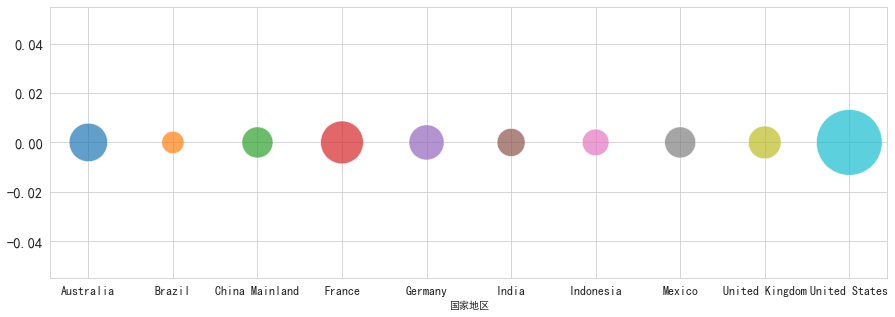

In [57]:
g=sns.scatterplot(x=df_10off.index,y=[0]*len(df_10off.index),
                hue=df_off.index,data=df_10off,
                size='总额',sizes=(500,500*df_10off['总额'].max()/df_10off['总额'].min()),
                legend=False,alpha=0.7)
g.figure.set_size_inches(15,5)
g.figure.canvas.draw() #画图
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

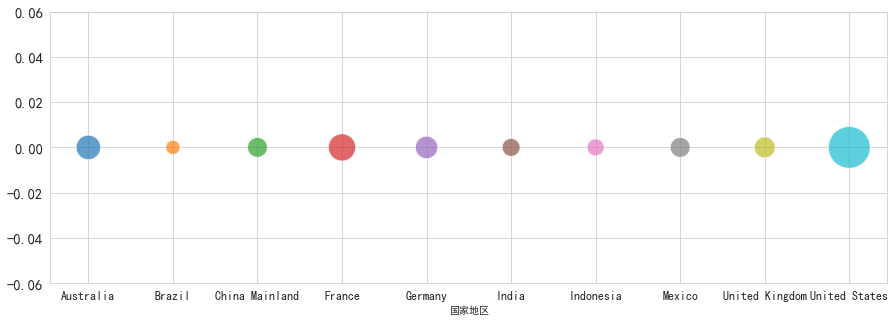

In [44]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df=sh
df = df[['订单号', '国家地区', '商品门类', '总额']]
df['商品门类'].replace('Office Supplies', '办公', inplace=True)

df_top10 = df.groupby('国家地区')[['总额']].sum().sort_values('总额', ascending=False).head(10)
df_top10 = df[df['国家地区'].isin(df_top10.index)]

df_off = df_top10[df_top10['商品门类']=='办公'].groupby('国家地区')[['总额']].sum()

df_off

#图表长15，宽5，透明度0.7，隐藏图例，点的面积、轴标签调整为合适的大小
g = sns.scatterplot(x=df_off.index, y=[0]*len(df_off), data=df_off, 
                    size='总额', alpha=0.7, hue=df_off.index, legend=False, 
                    sizes=( 200, 200 * df_off['总额'].max()/df_off['总额'].min() ))
    
g.figure.set_size_inches(15, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

###    下载并读取气象观测数据，完成以下需求：

    1. 创建气泡图，展示平均风速排名前5与最后5的站点中各个站点的平均风速，气泡从小到大排列。

    2. 要求图表长15，宽5，透明度0.9，隐藏图例，点的面积、轴标签调整为合适的大小。

In [105]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_excel(r'C:\Users\YcAllenEffy\Desktop\气象观测.xlsx')
df=sh

In [102]:
df

,时间,站点,气温,湿度,风速,风向,气压
0,2015-01-09 22:00:00,G1155,155,52,10,327,10154
1,2015-01-09 23:00:00,G1155,154,52,9,343,10154
2,2015-01-10 00:00:00,G1155,148,54,9,320,10147
3,2015-01-10 01:00:00,G1155,145,55,5,18,10142
4,2015-01-10 02:00:00,G1155,142,59,9,27,10137
...,...,...,...,...,...,...,...
9995,2015-08-22 14:00:00,G3522,338,57,7,23,9970
9996,2015-08-22 14:00:00,G3528,348,54,20,14,9948
9997,2015-08-23 21:00:00,G3561,326,57,11,344,9973
9998,2015-08-23 21:00:00,G3556,329,56,23,37,9977


In [103]:
df=df.groupby('站点').mean().sort_values('风速')
df=df.drop(df.index[5:31])
df


,气温,湿度,风速,风向,气压
站点,,,,,
G3522,292.177778,74.244444,6.103704,206.296296,10062.311111
G3551,287.058824,73.647059,9.455882,127.250000,9991.941176
G3528,289.414013,77.382166,10.121019,135.414013,10037.987261
G3558,288.991597,74.411765,11.184874,177.621849,10007.411765
G3548,288.310127,77.588608,11.601266,143.575949,10031.930380
G3550,290.696721,73.877049,24.500000,147.762295,10011.770492
G3541,280.089552,79.485075,24.805970,151.141791,10039.089552
G3523,285.540000,73.940000,25.673333,123.626667,9958.840000
G3556,291.235714,73.892857,27.435714,144.121429,10049.221429


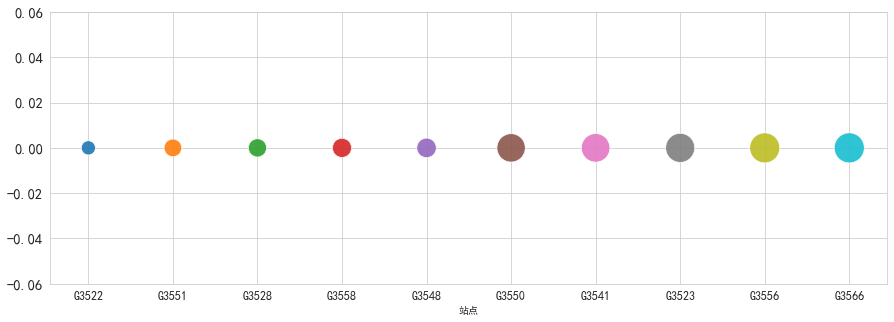

In [104]:
# 画图
g = sns.scatterplot(x=df.index, y=[0]*len(df), data=df, 
                    size='风速', alpha=0.9, hue=df.index, legend=False, 
                    sizes=( 200, 200 * df['风速'].max()/df['风速'].min() ))
    
g.figure.set_size_inches(15, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

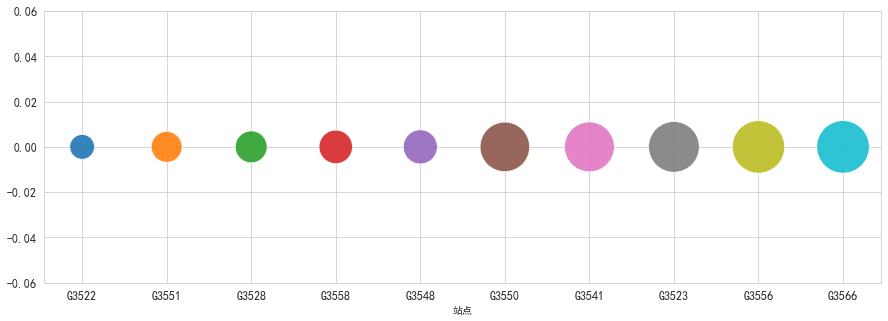

In [89]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False



df_top5 = df.groupby('站点')[['风速']].mean().sort_values('风速', ascending=False).head(5)
df_bot5 = df.groupby('站点')[['风速']].mean().sort_values('风速', ascending=False).tail(5)

df_t = df_top5.append(df_bot5)
df_t = df_t.sort_values('风速')

g = sns.scatterplot(x=df_t.index, y=[0]*len(df_t), data=df_t, 
                    size='风速', alpha=0.9, hue=df_t.index, legend=False, 
                    sizes=( 100*df_t['风速'].min(), 100*df_t['风速'].max() ))
g.figure.set_size_inches(15, 5)

g.figure.canvas.draw()
g.set_xticks(g.get_xticks())
g.set_yticks(g.get_yticks())
g.set_xticklabels(labels=g.get_xticklabels(), size='large')
g.set_yticklabels(labels=g.get_yticklabels(), size='large');

### 下载并读取气象观测数据，完成以下需求：

    1. 创建气泡图，展示风向最小值排名前5与倒数第 5~3 名的8个站点中各个站点的最小风向，气泡从大到小排列。

    2. 要求图表长17，宽5，透明度0.6，隐藏图例，点的面积、轴标签调整为合适的大小。

In [106]:
df3=df.groupby('站点').min().sort_values('风向',ascending=False)
df3=df3.drop(df3.index[5:31])
df3=df3.drop(df3.index[8:10])
df3

,时间,气温,湿度,风速,风向,气压
站点,,,,,,
G3558,2015-08-03 20:00:00,248,40,4,21,9891
G3559,2015-08-04 01:00:00,238,37,2,11,9875
G3570,2015-07-31 20:00:00,237,42,3,11,9871
G3553,2015-08-04 01:00:00,242,41,2,9,9866
G3640,2015-07-31 20:00:00,248,0,3,7,9944
G3541,2015-08-01 09:00:00,245,44,5,1,9920
G3522,2015-08-01 08:00:00,253,42,1,1,9940
G1166,2015-08-01 00:00:00,245,40,3,1,9910


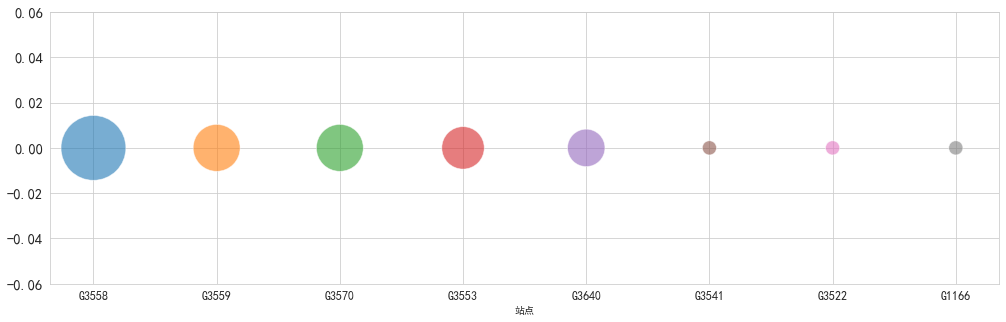

In [107]:

# 画图
g = sns.scatterplot(x=df3.index, y=[0]*len(df3), data=df3, 
                    size='风向', alpha=0.6, hue=df3.index, legend=False, 
                    sizes=( 200, 200 * df3['风向'].max()/df3['风向'].min() ))
    
g.figure.set_size_inches(17, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

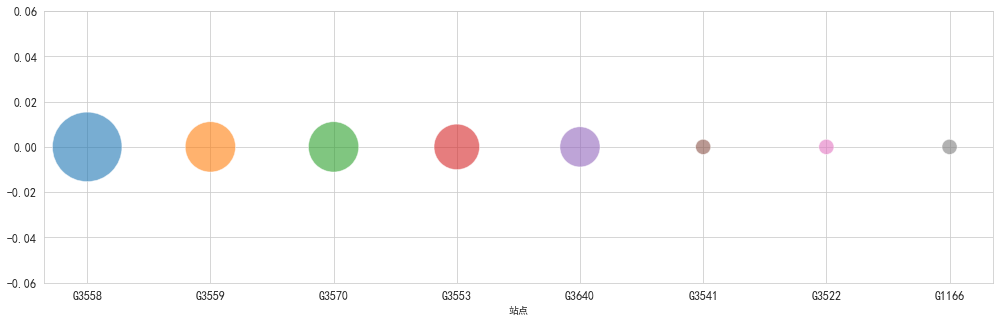

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False


df_top5 = df.groupby('站点')[['风向']].min().sort_values('风向', ascending=False).head(5)
df_bot5 = df.groupby('站点')[['风向']].min().sort_values('风向', ascending=False)[-5:-2]

df_t = df_top5.append(df_bot5)

g = sns.scatterplot(x=df_t.index, y=[0]*len(df_t), data=df_t, 
                    size='风向', alpha=0.6, hue=df_t.index, legend=False, 
                    sizes=( 230*df_t['风向'].min(), 230*df_t['风向'].max() ))
g.figure.set_size_inches(17, 5)

g.figure.canvas.draw()
g.set_xticks(g.get_xticks())
g.set_yticks(g.get_yticks())
g.set_xticklabels(labels=g.get_xticklabels(), size='large')
g.set_yticklabels(labels=g.get_yticklabels(), size='large');

### 下载并读取气象观测数据，完成以下需求：

    1. 创建气泡图，展示各个月的平均气温。

    2. 要求图表长17，宽5，透明度0.6，隐藏图例，点的面积、轴标签调整为合适的大小。

In [113]:
df['时间']=pd.to_datetime(df['时间'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   时间      10000 non-null  datetime64[ns]
 1   站点      10000 non-null  object        
 2   气温      10000 non-null  int64         
 3   湿度      10000 non-null  int64         
 4   风速      10000 non-null  int64         
 5   风向      10000 non-null  int64         
 6   气压      10000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 547.0+ KB


In [114]:
df['月份']=df['时间'].dt.month
df

,时间,站点,气温,湿度,风速,风向,气压,月份
0,2015-01-09 22:00:00,G1155,155,52,10,327,10154,1
1,2015-01-09 23:00:00,G1155,154,52,9,343,10154,1
2,2015-01-10 00:00:00,G1155,148,54,9,320,10147,1
3,2015-01-10 01:00:00,G1155,145,55,5,18,10142,1
4,2015-01-10 02:00:00,G1155,142,59,9,27,10137,1
...,...,...,...,...,...,...,...,...
9995,2015-08-22 14:00:00,G3522,338,57,7,23,9970,8
9996,2015-08-22 14:00:00,G3528,348,54,20,14,9948,8
9997,2015-08-23 21:00:00,G3561,326,57,11,344,9973,8
9998,2015-08-23 21:00:00,G3556,329,56,23,37,9977,8


In [120]:
df4=df.groupby('月份')[['气温']].mean()

In [122]:
df4

,气温
月份,
1,162.723118
2,178.671131
3,201.486559
4,234.338889
5,271.649194
6,294.444444
7,290.801075
8,294.497849
9,280.553291


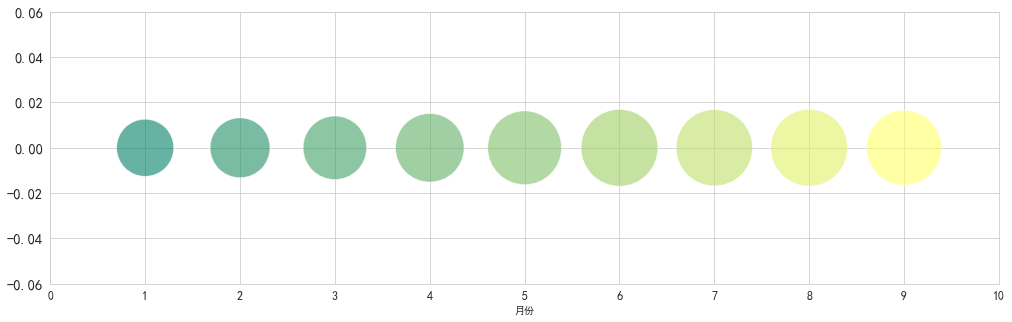

In [128]:

# 画图
g = sns.scatterplot(x=df4.index, y=[0]*len(df4), data=df4, 
                    size='气温', alpha=0.6, hue=df4.index, legend=False, 
                    sizes=( 20*df4['气温'].min(), 20*df4['气温'].max() ),palette='summer')
    
g.figure.set_size_inches(17, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

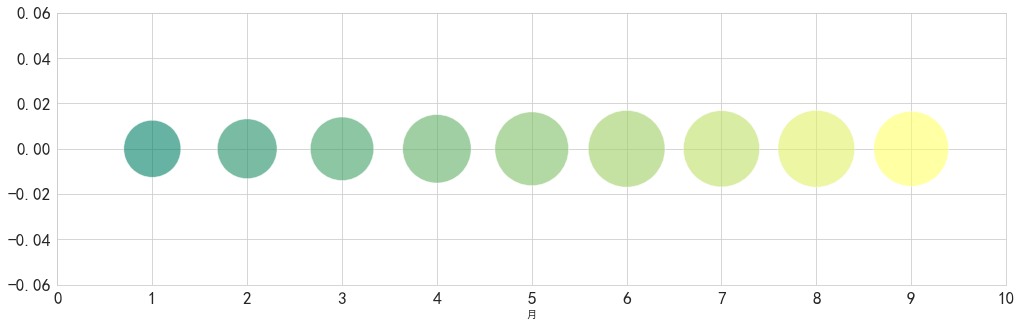

In [126]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False



df['时间'] = pd.to_datetime(df['时间'])
df['月'] = df['时间'].dt.month

df_t = df.groupby('月')[['气温']].mean()

g = sns.scatterplot(x=df_t.index, y=[0]*len(df_t), data=df_t, 
                    size='气温', alpha=0.6, hue=df_t.index, legend=False, 
                    sizes=( 20*df_t['气温'].min(), 20*df_t['气温'].max() ), palette='summer')
g.figure.set_size_inches(17, 5)

g.figure.canvas.draw()
g.set_xticks(g.get_xticks())
g.set_yticks(g.get_yticks())
g.set_xticklabels(labels=g.get_xticklabels(), size='xx-large')
g.set_yticklabels(labels=g.get_yticklabels(), size='xx-large');

###     下载并读取国际卖场数据，完成以下需求：

    分别创建柱形图与气泡图，展示销售总额排名前5名和中间5名国家的家具销售总额。 

In [164]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\国际卖场数据2011-2015.csv')
df=sh

In [130]:
df

,订单号,订单日期,发货日期,运输等级,顾客编号,顾客名称,顾客类型,城市,州省,国家地区,...,商品编号,商品门类,商品子类,商品名称,总额,数量,折扣,营利,运费,订单优先级
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra?,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju?rez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [135]:
df5=df.groupby('国家地区')[['总额']].sum().sort_values('总额',ascending=False)

In [137]:
df55=df5.head(5)
df55

,总额
国家地区,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China Mainland,7.005620e+05
Germany,6.288400e+05


In [145]:
L=len(df5)
M=L//2
dfm5=df5.iloc[M-2:M+3]
dfm5

,总额
国家地区,
Bulgaria,15557.64000
Portugal,15105.12000
Hungary,14254.05000
Belarus,13386.09000
Ecuador,13342.98036


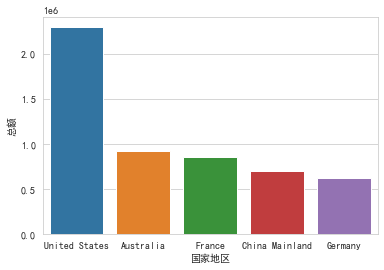

In [155]:
sns.barplot(data=df55,x=df55.index,y='总额')

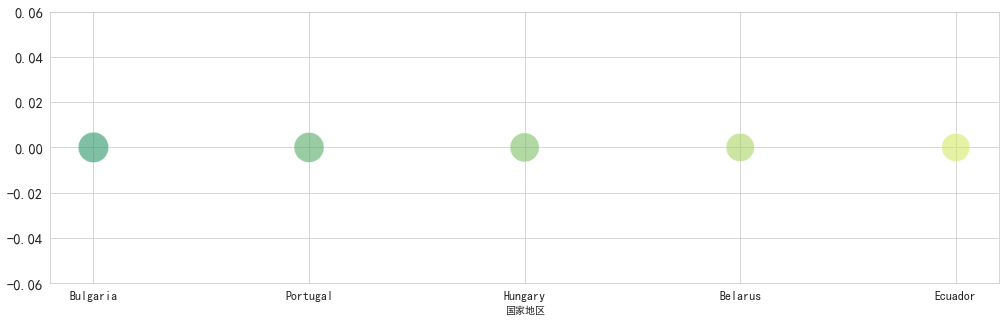

In [162]:
# sns.scatterplot(data=dfm5,x=dfm5.index,y='总额')
g = sns.scatterplot(x=dfm5.index, y=[0]*len(dfm5), data=dfm5, 
                    size='总额', alpha=0.6, hue=dfm5.index, legend=False, 
                    sizes=( 800,800*dfm5['总额'].max()/dfm5['总额'].min() ),palette='summer')
    
g.figure.set_size_inches(17, 5) #图形大小设置
g.figure.canvas.draw() #画图
g.set_xticks(g.get_xticks())# 获取x轴数值
g.set_yticks(g.get_yticks()) #获取y轴数值
g.set_xticklabels(labels=g.get_xticklabels(), size='large')#x轴标签字体设置large 大号
g.set_yticklabels(labels=g.get_yticklabels(), size='x-large');#y轴标签字体设置为x-large 加大号

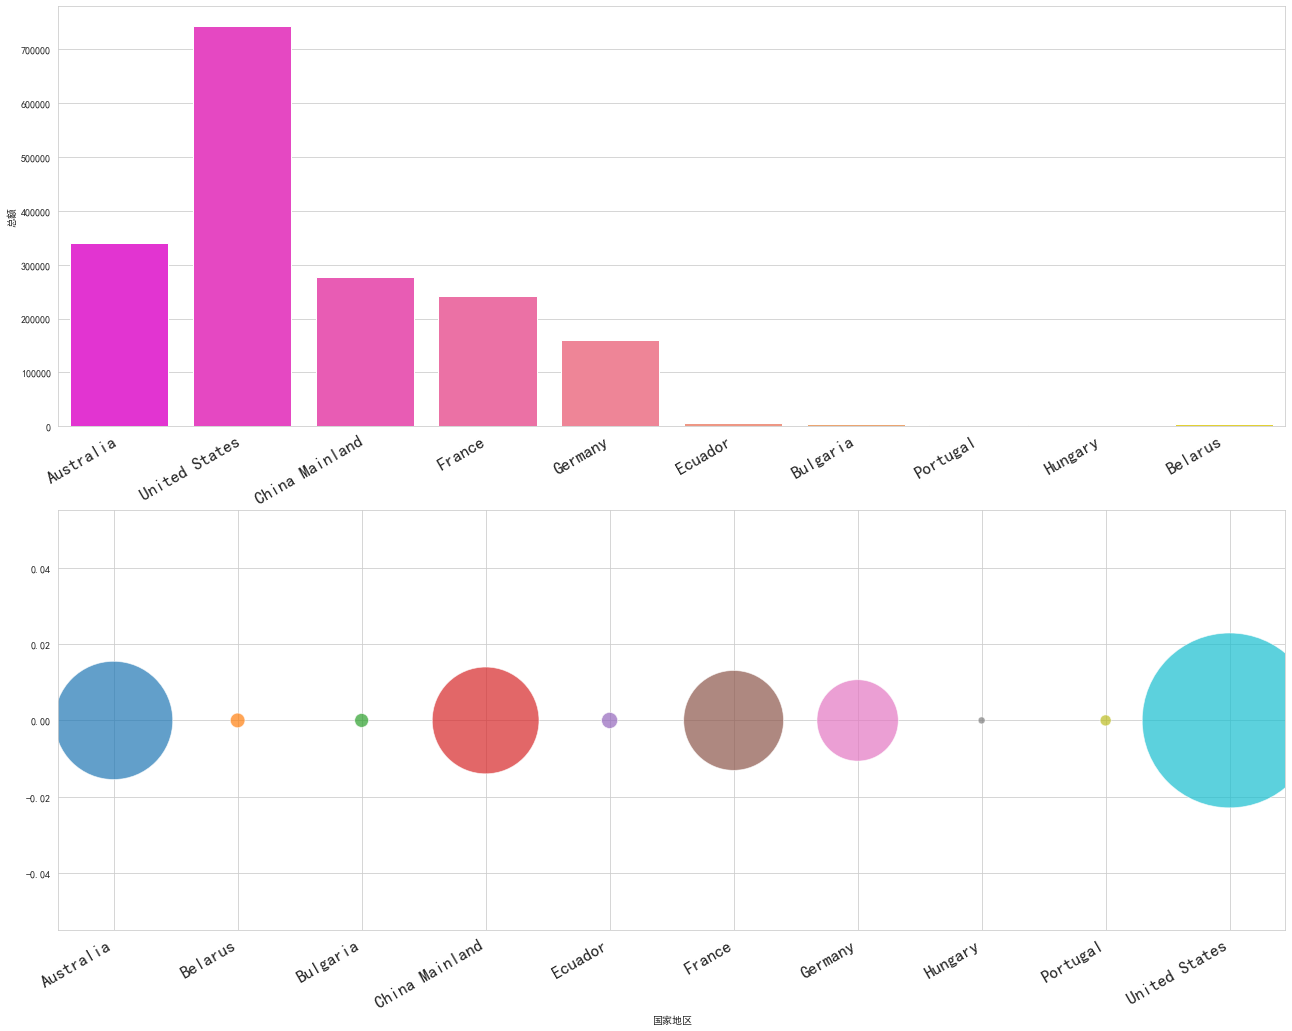

In [166]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

# df = pd.read_csv(r'.\国际卖场数据2011-2015.csv')
df = df[['订单号', '国家地区', '商品门类', '总额']]
df['商品门类'].replace('Office Supplies', '办公', inplace=True)
df['商品门类'].replace('Furniture', '家具', inplace=True)
df['商品门类'].replace('Technology', '科技', inplace=True)

df_top5 = df.groupby('国家地区')[['总额']].sum().sort_values('总额', ascending=False).head(5)

df_mid5 = df.groupby('国家地区')[['总额']].sum().sort_values('总额', ascending=False)
p = len(df_mid5['总额'])//2
df_mid5 = df_mid5[(p-2):(p+3)]

df_sample = df_top5.append(df_mid5)
df_sample = df[df['国家地区'].isin(df_sample.index)]
df_furn = df_sample[df_sample['商品门类']=='家具']

fig,axs = plt.subplots(2, 1, figsize=(22, 17))

g1 = sns.barplot(x='国家地区', y='总额', data=df_furn, 
                estimator=sum, palette='spring', ci=None, ax=axs[0])
g1.set_xticklabels(labels=g1.get_xticklabels(), rotation=30, horizontalalignment='right', size='xx-large');

df_t = df_furn.groupby('国家地区')[['总额']].sum()
g2 = sns.scatterplot(x=df_t.index, y=[0]*len(df_t), data=df_t, 
                    size='总额', alpha=0.7, hue=df_t.index, legend=False, 
                    sizes=( 50, 50 * df_t['总额'].max()/df_t['总额'].min() ), ax=axs[1])
g2.figure.canvas.draw()
g2.set_xticks(g2.get_xticks())
g2.set_xticklabels(labels=g2.get_xticklabels(), rotation=30, horizontalalignment='right',size='xx-large');